In [1]:
## Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split

In [2]:
# load the sonar returns dataset (binary classfication of Rock vs Metal)
# more information here
# https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
# Each sonar return (a row) is a set of 60 numbers in the range 0.0 to 1.0
# where represents the energy within a particular frequency band

sonar_df = pd.read_csv('sonar_data.csv', header=None)  #column 60 is the label
#randomly premute rows 
sonar_df = sonar_df.sample(frac=1).reset_index(drop=True)
sonar_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0116,0.0179,0.0449,0.1096,0.1913,0.0924,0.0761,0.1092,0.0757,0.1006,...,0.0163,0.0099,0.0084,0.0270,0.0277,0.0097,0.0054,0.0148,0.0092,M
1,0.0123,0.0309,0.0169,0.0313,0.0358,0.0102,0.0182,0.0579,0.1122,0.0835,...,0.0133,0.0265,0.0224,0.0074,0.0118,0.0026,0.0092,0.0009,0.0044,R
2,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
3,0.0221,0.0065,0.0164,0.0487,0.0519,0.0849,0.0812,0.1833,0.2228,0.1810,...,0.0089,0.0051,0.0015,0.0075,0.0058,0.0016,0.0070,0.0074,0.0038,M
4,0.0388,0.0324,0.0688,0.0898,0.1267,0.1515,0.2134,0.2613,0.2832,0.2718,...,0.0255,0.0071,0.0263,0.0079,0.0111,0.0107,0.0068,0.0097,0.0067,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0189,0.0308,0.0197,0.0622,0.0080,0.0789,0.1440,0.1451,0.1789,0.2522,...,0.0038,0.0096,0.0142,0.0190,0.0140,0.0099,0.0092,0.0052,0.0075,R
204,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
205,0.0209,0.0278,0.0115,0.0445,0.0427,0.0766,0.1458,0.1430,0.1894,0.1853,...,0.0096,0.0014,0.0049,0.0039,0.0029,0.0078,0.0047,0.0021,0.0011,M
206,0.0180,0.0444,0.0476,0.0698,0.1615,0.0887,0.0596,0.1071,0.3175,0.2918,...,0.0122,0.0114,0.0098,0.0027,0.0025,0.0026,0.0050,0.0073,0.0022,M


Text(0.5, 1.05, 'Metal, sonar data')

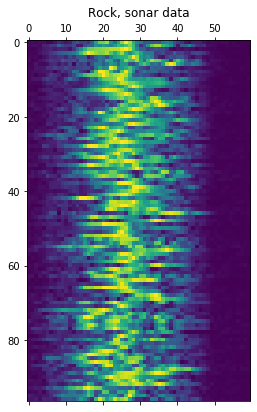

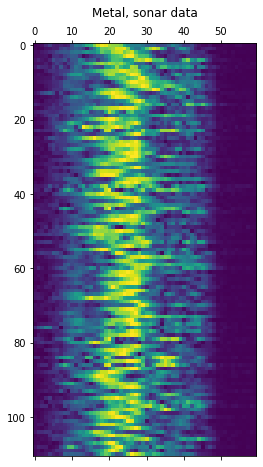

In [3]:
## Visualize the data
plt.matshow(sonar_df.loc[sonar_df[60]=='R'][[i for i in range(60)]])
plt.title('Rock, sonar data')

plt.matshow(sonar_df.loc[sonar_df[60]=='M'][[i for i in range(60)]])
plt.title('Metal, sonar data')

In [4]:
## Split data into training and test 
X = np.array(sonar_df[[i for i in range(60)]])
y = np.array(sonar_df[[60]])

# convert strings to binary inputs
y = np.array([1 if i == 'M' else 0 for i in y])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [5]:
## Scale data
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [7]:
import tensorflow as tf
from tensorflow import keras

## Setup
model = keras.Sequential([
    keras.Input(shape=(60)),
    keras.layers.Dense(15),
    keras.layers.Dense(15),
    keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## train model
pred = model.fit(X_train, y_train, epochs=500)

## predict on test data
pred = model.predict(X_test)

## model.predict returns a vector for each input 
y_hat = [0 if i[0] > i[1] else 1 for i in pred]
print(y_hat)

Train on 166 samples
Epoch 1/500
166/166 [==============================] - 0s 2ms/sample - loss: 1.3073 - accuracy: 0.4337
Epoch 2/500
166/166 [==============================] - 0s 51us/sample - loss: 1.0446 - accuracy: 0.4940
Epoch 3/500
166/166 [==============================] - 0s 49us/sample - loss: 0.9006 - accuracy: 0.5241
Epoch 4/500
166/166 [==============================] - 0s 49us/sample - loss: 0.8022 - accuracy: 0.5663
Epoch 5/500
166/166 [==============================] - 0s 46us/sample - loss: 0.7379 - accuracy: 0.5904
Epoch 6/500
166/166 [==============================] - 0s 52us/sample - loss: 0.6833 - accuracy: 0.6386
Epoch 7/500
166/166 [==============================] - 0s 53us/sample - loss: 0.6440 - accuracy: 0.6506
Epoch 8/500
166/166 [==============================] - 0s 55us/sample - loss: 0.6079 - accuracy: 0.6446
Epoch 9/500
166/166 [==============================] - 0s 51us/sample - loss: 0.5848 - accuracy: 0.6747
Epoch 10/500
166/166 [======================

166/166 [==============================] - 0s 57us/sample - loss: 0.2432 - accuracy: 0.9096
Epoch 79/500
166/166 [==============================] - 0s 53us/sample - loss: 0.2406 - accuracy: 0.9096
Epoch 80/500
166/166 [==============================] - 0s 59us/sample - loss: 0.2384 - accuracy: 0.9217
Epoch 81/500
166/166 [==============================] - 0s 55us/sample - loss: 0.2380 - accuracy: 0.9096
Epoch 82/500
166/166 [==============================] - 0s 53us/sample - loss: 0.2331 - accuracy: 0.9277
Epoch 83/500
166/166 [==============================] - 0s 54us/sample - loss: 0.2337 - accuracy: 0.9217
Epoch 84/500
166/166 [==============================] - 0s 54us/sample - loss: 0.2316 - accuracy: 0.9157
Epoch 85/500
166/166 [==============================] - 0s 49us/sample - loss: 0.2288 - accuracy: 0.9157
Epoch 86/500
166/166 [==============================] - 0s 56us/sample - loss: 0.2258 - accuracy: 0.9157
Epoch 87/500
166/166 [==============================] - 0s 52us/samp

166/166 [==============================] - 0s 73us/sample - loss: 0.1630 - accuracy: 0.9458
Epoch 156/500
166/166 [==============================] - 0s 70us/sample - loss: 0.1583 - accuracy: 0.9398
Epoch 157/500
166/166 [==============================] - 0s 76us/sample - loss: 0.1548 - accuracy: 0.9458
Epoch 158/500
166/166 [==============================] - 0s 58us/sample - loss: 0.1517 - accuracy: 0.9458
Epoch 159/500
166/166 [==============================] - 0s 53us/sample - loss: 0.1544 - accuracy: 0.9518
Epoch 160/500
166/166 [==============================] - 0s 54us/sample - loss: 0.1512 - accuracy: 0.9458
Epoch 161/500
166/166 [==============================] - 0s 57us/sample - loss: 0.1512 - accuracy: 0.9639
Epoch 162/500
166/166 [==============================] - 0s 55us/sample - loss: 0.1500 - accuracy: 0.9578
Epoch 163/500
166/166 [==============================] - 0s 56us/sample - loss: 0.1497 - accuracy: 0.9518
Epoch 164/500
166/166 [==============================] - 0s 

166/166 [==============================] - 0s 53us/sample - loss: 0.1033 - accuracy: 0.9759
Epoch 233/500
166/166 [==============================] - 0s 51us/sample - loss: 0.1022 - accuracy: 0.9880
Epoch 234/500
166/166 [==============================] - 0s 53us/sample - loss: 0.1022 - accuracy: 0.9819
Epoch 235/500
166/166 [==============================] - 0s 53us/sample - loss: 0.1003 - accuracy: 0.9759
Epoch 236/500
166/166 [==============================] - 0s 51us/sample - loss: 0.1012 - accuracy: 0.9699
Epoch 237/500
166/166 [==============================] - 0s 54us/sample - loss: 0.0998 - accuracy: 0.9699
Epoch 238/500
166/166 [==============================] - 0s 54us/sample - loss: 0.1000 - accuracy: 0.9819
Epoch 239/500
166/166 [==============================] - 0s 53us/sample - loss: 0.0968 - accuracy: 0.9819
Epoch 240/500
166/166 [==============================] - 0s 52us/sample - loss: 0.0976 - accuracy: 0.9880
Epoch 241/500
166/166 [==============================] - 0s 

166/166 [==============================] - 0s 57us/sample - loss: 0.0659 - accuracy: 0.9880
Epoch 310/500
166/166 [==============================] - 0s 58us/sample - loss: 0.0627 - accuracy: 0.9940
Epoch 311/500
166/166 [==============================] - 0s 51us/sample - loss: 0.0649 - accuracy: 0.9880
Epoch 312/500
166/166 [==============================] - 0s 54us/sample - loss: 0.0634 - accuracy: 0.9880
Epoch 313/500
166/166 [==============================] - 0s 55us/sample - loss: 0.0628 - accuracy: 0.9940
Epoch 314/500
166/166 [==============================] - 0s 52us/sample - loss: 0.0635 - accuracy: 0.9940
Epoch 315/500
166/166 [==============================] - 0s 54us/sample - loss: 0.0635 - accuracy: 0.9880
Epoch 316/500
166/166 [==============================] - 0s 60us/sample - loss: 0.0627 - accuracy: 0.9880
Epoch 317/500
166/166 [==============================] - 0s 54us/sample - loss: 0.0611 - accuracy: 0.9880
Epoch 318/500
166/166 [==============================] - 0s 

166/166 [==============================] - 0s 52us/sample - loss: 0.0372 - accuracy: 0.9940
Epoch 387/500
166/166 [==============================] - 0s 52us/sample - loss: 0.0372 - accuracy: 1.0000
Epoch 388/500
166/166 [==============================] - 0s 57us/sample - loss: 0.0390 - accuracy: 1.0000
Epoch 389/500
166/166 [==============================] - 0s 53us/sample - loss: 0.0379 - accuracy: 0.9940
Epoch 390/500
166/166 [==============================] - 0s 52us/sample - loss: 0.0366 - accuracy: 0.9940
Epoch 391/500
166/166 [==============================] - 0s 52us/sample - loss: 0.0358 - accuracy: 0.9940
Epoch 392/500
166/166 [==============================] - 0s 53us/sample - loss: 0.0349 - accuracy: 0.9940
Epoch 393/500
166/166 [==============================] - 0s 52us/sample - loss: 0.0376 - accuracy: 0.9940
Epoch 394/500
166/166 [==============================] - 0s 47us/sample - loss: 0.0374 - accuracy: 0.9940
Epoch 395/500
166/166 [==============================] - 0s 

166/166 [==============================] - 0s 54us/sample - loss: 0.0201 - accuracy: 1.0000
Epoch 464/500
166/166 [==============================] - 0s 52us/sample - loss: 0.0205 - accuracy: 1.0000
Epoch 465/500
166/166 [==============================] - 0s 52us/sample - loss: 0.0206 - accuracy: 1.0000
Epoch 466/500
166/166 [==============================] - 0s 55us/sample - loss: 0.0193 - accuracy: 1.0000
Epoch 467/500
166/166 [==============================] - 0s 50us/sample - loss: 0.0210 - accuracy: 1.0000
Epoch 468/500
166/166 [==============================] - 0s 53us/sample - loss: 0.0233 - accuracy: 1.0000
Epoch 469/500
166/166 [==============================] - 0s 49us/sample - loss: 0.0219 - accuracy: 1.0000
Epoch 470/500
166/166 [==============================] - 0s 54us/sample - loss: 0.0202 - accuracy: 1.0000
Epoch 471/500
166/166 [==============================] - 0s 50us/sample - loss: 0.0179 - accuracy: 1.0000
Epoch 472/500
166/166 [==============================] - 0s 

In [8]:
print(confusion_matrix(y_test, y_hat))

[[14  3]
 [ 5 20]]


In [9]:
print(classification_report(y_test, y_hat))

## accuracy is 74%
## precision, for 'M', is the precent of retunred 'M' that are really M: Precision = TP / [TP + FP]
## recall is the precent of true true 'M' that are returned: Recall = TP / [TP + FN]
## f1 score is related to accuracy

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.87      0.80      0.83        25

    accuracy                           0.81        42
   macro avg       0.80      0.81      0.81        42
weighted avg       0.82      0.81      0.81        42

